In [47]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 149M/149M [00:01<00:00, 113MB/s]
100% 149M/149M [00:01<00:00, 129MB/s]


In [49]:
def get_class_paths(path):
    classes = []
    class_paths = []

    # Iterate through directories in the training path
    for label in os.listdir(path):
        label_path = os.path.join(path, label)

        # Check if it's a directory
        if os.path.isdir(label_path):

          # Iterate through images in the label directory
          for image in os.listdir(label_path):
              image_path = os.path.join(label_path, image)

              # Add class and path to respective lists
              classes.append(label)
              class_paths.append(label_path)

    # Create a DataFrame with the collected data
    df = pd.DataFrame({
        'Class Path': class_paths,
        'Class': classes })

    return df

In [50]:
# training data frame
tr_df = get_class_paths("/content/Training")

In [51]:
tr_df

,Class Path,Class
0,/content/Training/glioma,glioma
1,/content/Training/glioma,glioma
2,/content/Training/glioma,glioma
3,/content/Training/glioma,glioma
4,/content/Training/glioma,glioma
...,...,...
5707,/content/Training/notumor,notumor
5708,/content/Training/notumor,notumor
5709,/content/Training/notumor,notumor
5710,/content/Training/notumor,notumor


In [53]:
# testing data frame
ts_df = get_class_paths("/content/Testing")
ts_df

,Class Path,Class
0,/content/Testing/glioma,glioma
1,/content/Testing/glioma,glioma
2,/content/Testing/glioma,glioma
3,/content/Testing/glioma,glioma
4,/content/Testing/glioma,glioma
...,...,...
1306,/content/Testing/notumor,notumor
1307,/content/Testing/notumor,notumor
1308,/content/Testing/notumor,notumor
1309,/content/Testing/notumor,notumor


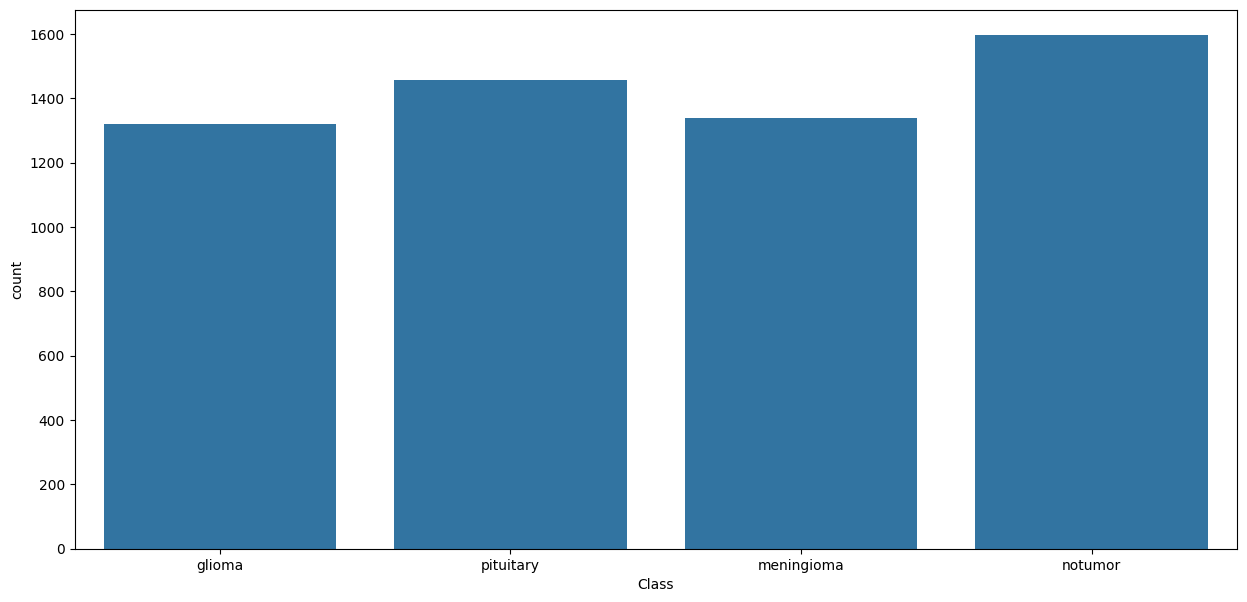

In [57]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

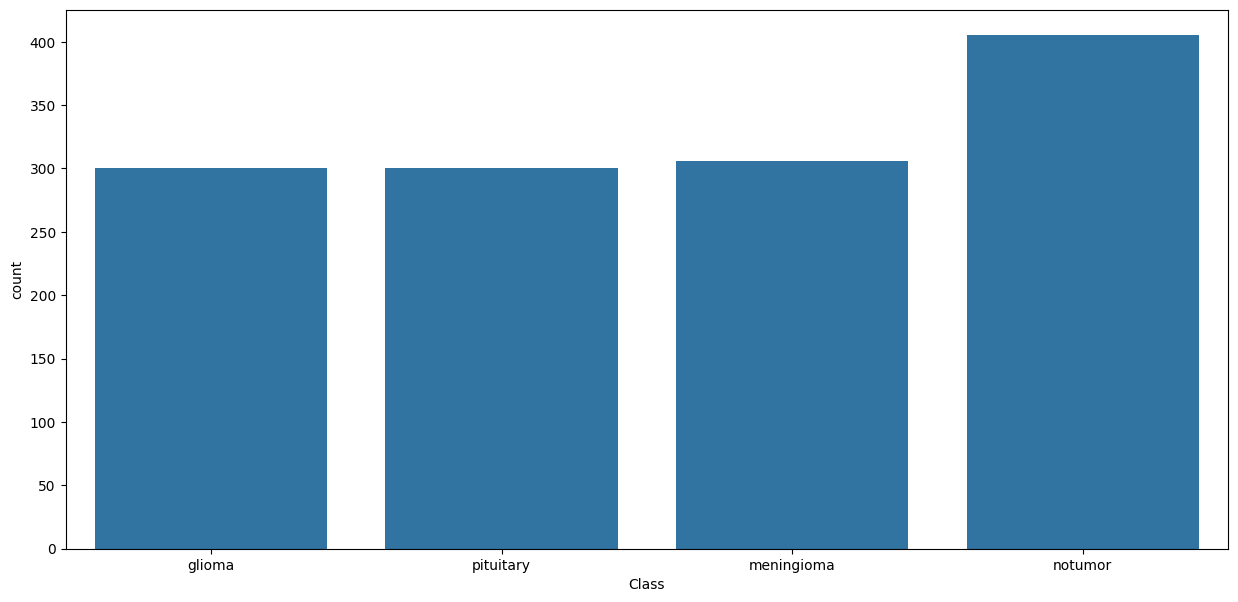

In [58]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [60]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [61]:
valid_df

,Class Path,Class
861,/content/Testing/meningioma,meningioma
135,/content/Testing/glioma,glioma
1117,/content/Testing/notumor,notumor
863,/content/Testing/meningioma,meningioma
1065,/content/Testing/notumor,notumor
...,...,...
1085,/content/Testing/notumor,notumor
1249,/content/Testing/notumor,notumor
769,/content/Testing/meningioma,meningioma
441,/content/Testing/pituitary,pituitary


In [64]:
ts_df

,Class Path,Class
914,/content/Testing/notumor,notumor
652,/content/Testing/meningioma,meningioma
719,/content/Testing/meningioma,meningioma
579,/content/Testing/pituitary,pituitary
982,/content/Testing/notumor,notumor
...,...,...
1233,/content/Testing/notumor,notumor
149,/content/Testing/glioma,glioma
721,/content/Testing/meningioma,meningioma
905,/content/Testing/meningioma,meningioma


In [107]:
batch_size = 32
img_size = (299,299)
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))
ts_gen = ImageDataGenerator(rescale=1/255)

In [108]:
tr_gen = image_generator.flow_from_dataframe(tr_df,
                                             x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size,
                                             validate_filenames=False)

valid_gen = image_generator.flow_from_dataframe(valid_df,
                                                x_col='Class Path',
                                                y_col='Class',
                                                batch_size=batch_size,
                                                target_size=img_size,
                                                validate_filenames=False)

ts_gen = ts_gen.flow_from_dataframe(ts_df,
                                    x_col='Class Path',
                                    y_col='Class',
                                    batch_size=16,
                                    shuffle=False,
                                    validate_filenames=False)

Found 5712 non-validated image filenames belonging to 4 classes.
Found 655 non-validated image filenames belonging to 4 classes.
Found 656 non-validated image filenames belonging to 4 classes.


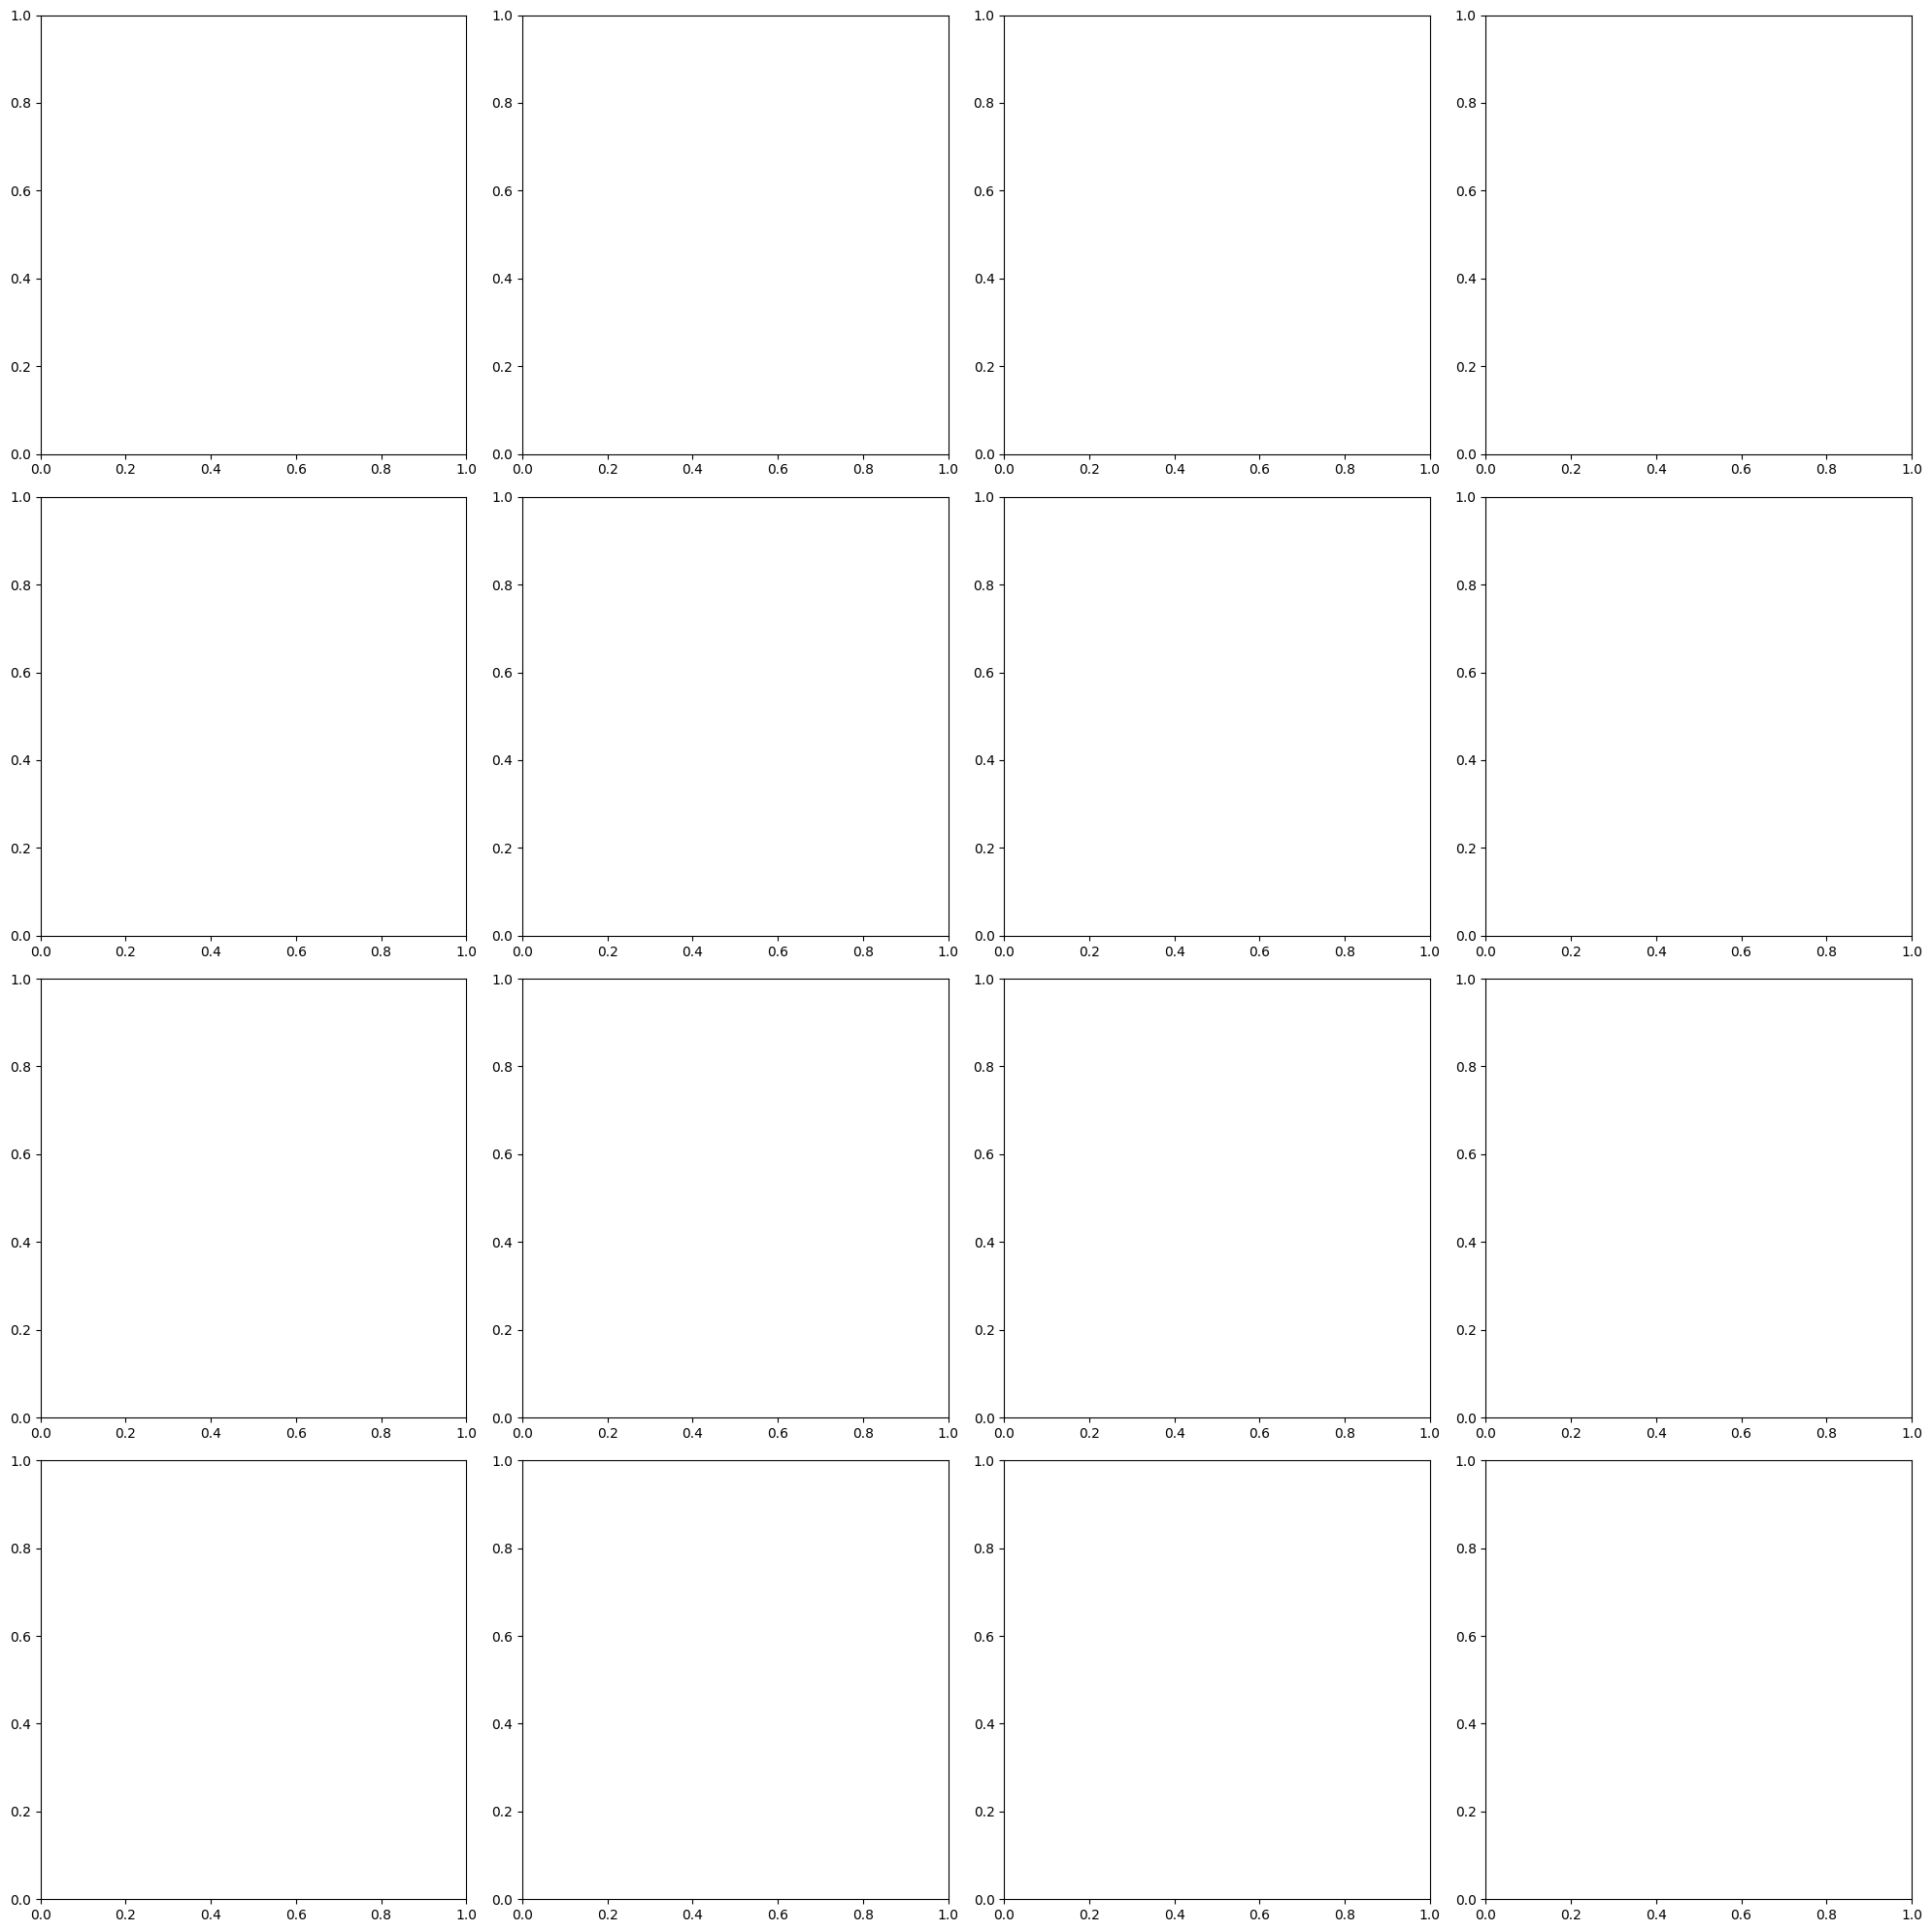

In [110]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  try:
    batch = next(tr_gen)
  except:
    continue

  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  # Get the class index
  class_index = np.argmax(label)

  # Get the list of class names and class indices
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  # Find the index of the class_index in the list of indices
  index_position = class_indices.index(class_index)

  # Get the class name using the index position
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')
plt.tight_layout()
plt.show()